# Homework 8: Programming Exercises




Before you get started you might want to run the following cell (and potentially add your own import lines to it later on):

In [89]:
import numpy as np
from numpy.random import randint, uniform
import matplotlib.pyplot as plt
import collections as c

## Exercise 1
Each day, around midday, a long line forms at the Warren Tower Subway. People line up to get their favorite lunch options. The time (in minutes) it takes to make and sell a sub depends on the type of order, and we model it as a real number chosen uniformly and independently at random from the interval [0,15]. For simplicity, we will assume that only one order is processed at a time, and that each order is placed in the exact moment in which the previous sub is ready. 

Let $X$ be the random variable equal to the number of people that place an order in 15 minutes.

<b>Example:</b> If the first person's sub takes 4.3 minutes to make, the second person's sub takes 7.7 minutes, and the third person's sub takes 4.475 minutes, then $X = 3$ (even if the third person's sub is not done in the 15 minute window).

Write a function that empirically estimates $\mathrm{Ex}(X)$. Use a sufficiently large number of trials (e.g., 10000) and have your function return the estimated value.

In [182]:
def estimate_expected_orders():
    N=10000
    total_customers=[]
    for i in range(N):
        customers=0
        total_time = 0
        while (total_time<=15):
            sub_time = uniform(0, 15)
            customers+=1
            total_time+=sub_time
        total_customers.append(customers)
        total_time=0
        customers=0
    avg_customers=sum(total_customers)
    return avg_customers/N

print(estimate_expected_orders())

2.7205


## Exercise 2
This question is about an experiment we did in the first lecture. We have seen that the following code estimates the answer to the question:

> We roll a fair die repeatedly until we roll a 6. How many rolls do we expect given than all the rolls gave even numbers?

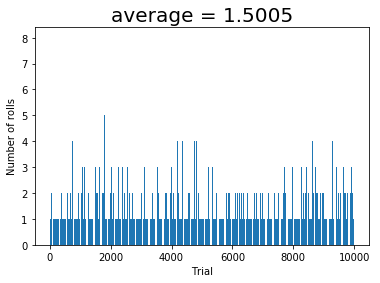

In [3]:
def single_trial():
    num_rolls = 0
    while True:
        num_rolls = num_rolls + 1
        die_roll = randint(1, 7) #fair die roll
        if die_roll == 1 or die_roll == 3 or die_roll == 5:
            # restart the experiment
            num_rolls = 0
            continue
        if die_roll == 6:
            break
    return num_rolls

# perform N trials
N = 10000
rolls = []
trial = [i + 1 for i in range(N)]
for i in range(N):
    num_rolls = single_trial()
    rolls.append(num_rolls)

avg_rolls = sum(rolls)
avg_rolls = avg_rolls / N
plt.bar(trial,rolls)
plt.xlabel("Trial")
plt.ylabel("Number of rolls")
plt.title("average = "  + str(avg_rolls),fontsize=20)
plt.show()

You now know that the above question is asking for the conditional expectation of the number of die rolls until we roll a 6, conditioned on the event that all of the rolls are 2, 4, or 6.

Consider the following modified version of the above question and experiment. Instead of a fair $6$-sided die, we now have a fair $k$-sided die with the numbers $1$ through $k$ written on it. The question we are interested in is the following:

> What is the expected number of rolls of the $k$-sided die until we roll a $6$, given that all the rolls are 2, 4, or 6?

### Exercise 2(a)

Write a function that takes as input an integer $k \geq 6$ and it returns an estimate of the expected number of rolls of the $k$-sided die until we roll a 6, given that all the results are 2, 4, or 6.

In [12]:
def estimate_expected_rolls(k):
    N=10000
    rolls=[]
    for i in range(N):
        num_rolls = 0
        while(True):
            num_rolls = num_rolls + 1
            die_roll = randint(1, k+1) #fair die roll
            if die_roll != 2 and die_roll != 4 and die_roll !=6:
                # restart the experiment
                num_rolls = 0
                continue
            if die_roll == 6:
                break
        if(num_rolls!=0):
            rolls.append(num_rolls)
            
    avg_rolls = sum(rolls)
    avg_rolls = avg_rolls / N
    return avg_rolls


### Exercise 2(b)

Next, pick some large values of $k$ and try your code.

In [25]:
# Example run with k = 1000
estimate_expected_rolls(1000)
estimate_expected_rolls(10000)

1.0

### Exercise 2(c)

What do you think happens as $k\to \infty$?

<b>Answer:</b> The experiment shows that at k=6 we expect 1.5 rolls, at k=1000 we expect 1 roll, at k=10000 we expect 1 roll and at k=100000 we expect 1 roll. Given the results of the experiments as k gets larger and larger the expected value is exactly 1. So it seems that as $k\to \infty$ the expected number of rolls is 1

## Exercise 3

This question is about an experiment that was recently discussed in class (see the [variance slides](https://www.dropbox.com/s/di7anfv3qc7wpxv/cs237L18.pdf?dl=0)). Consider the following two games:

* <b>Game 1: </b>You toss a coin every day. Each time, with probability $1\over 3$ you lose $1\$$ and with probability $2 \over 3$ you win $2 \$$,

* <b>Game 2: </b>You toss a coin every day. Each time, with probability $1\over 3$ you lose $2001\$$ and with probability $2 \over 3$ you win $1002 \$$.

We saw in class that the expected winning of these games is exactly $1\$$.

### Exercise 3 (a)

Write two functions, which simulate one round of Game 1 and Game 2 respectively.

In [47]:
# Your code here

def play_g1_once():
    outcome= np.random.choice(['a','b', 'b'],1)
    if(outcome=='a'):
        return -1
    else:
        return 2

def play_g2_once():
    # runs Game 2, returns the winnings: output is either -2001 or 1002
    outcome= np.random.choice(['a','b','b'],1)
    if(outcome=='a'):
        return -2001
    else:
        return 1002


### Exercise 3 (b)

Write two functions, which simulate playing Game 1 and Game 2 respectively, where we play each game once every day for a year. You will need to call the functions you wrote above.

In [181]:
# Your code here

def play_for_one_year_g1():
    # Plays Game 1 365 times, returns total winnings
    winnings = 0
    for i in range(365):
        winnings += play_g1_once()
    return winnings

def play_for_one_year_g2():
    # Plays Game 2 365 times, returns total winnings
    winnings = 0
    for i in range(365):
        winnings += play_g2_once()
    return winnings


### Exercise 3 (c)

Run the above functions multiple times, and plot the empirical probability distribution of the winnings resulting from playing the games for one whole year.

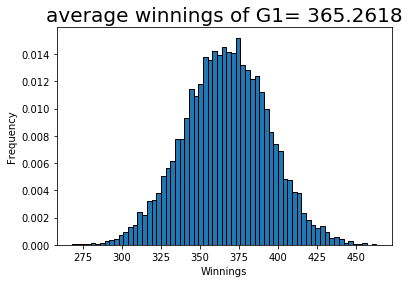

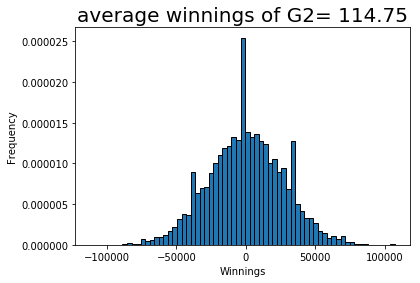

In [211]:

def estimate_g1(n=10000):
    # runs play_for_one_year_g1() n times and plots the empirical distribution (histogram of results)
    total_winnings = []
    for i in range(n):
        winnings = play_for_one_year_g1()
        total_winnings.append(winnings)
    s=set(total_winnings)
    avg_winnings = sum(total_winnings)
    avg_winnings = avg_winnings / n
    
    plt.hist(total_winnings, bins=len(s), edgecolor='black', density=True)
    plt.xlabel("Winnings")
    plt.ylabel("Frequency")
    plt.title("average winnings of G1= "  + str(avg_winnings),fontsize=20)
    plt.show()

    


def estimate_g2(n=10000):
    # runs play_for_one_year_g2() n times and plots the empirical distribution (histogram or results)
    total_winnings = []
    for i in range(n):
        winnings = play_for_one_year_g2()
        total_winnings.append(winnings)
    
    s=set(total_winnings)
    avg_winnings = sum(total_winnings)
    avg_winnings = avg_winnings / n
    
    plt.hist(total_winnings, bins=len(s), edgecolor='black', density=True)
    plt.xlabel("Winnings")
    plt.ylabel("Frequency")
    plt.title("average winnings of G2= "  + str(avg_winnings),fontsize=20)
    plt.show()

estimate_g1()
estimate_g2()


## Exercise 4

You invest in a stock originally worth $0\$$. The value of the stock goes up or down by exactly $1\$$ each day with equal probability, potentially going in the negatives. Let $S_i$ be the value of the stock on day $i$. We track the value of the stock for a year (365 days). Note that at the end of the year, the value $S_{365}$ is some integer number between -365 and 365.

Let $P$ be the number of days $i$ in which $S_i >0$. Note that $P$ is some integer between 0 and 365.

<b>Think:</b> what do you think the distribution of $P$ looks like?

In this exercise we will answer this question via simulation.

### Exercise 4 (a)
Write a function that gives you the increment in stock value in a day.

In [74]:
# Your code here

def one_day_stock_increase():
    outcome= np.random.choice(['a','b'],1)
    if(outcome=='a'):
        return -1
    else:
        return 1

### Exercise 4(b)

Write a function that keeps track of the value $S_i$ of the stock every day for one year, and counts the number of the day in which $S_i$ is positive.

In [77]:
# Your code here

def number_of_positive_days_in_year():
    # Simulates the stock value for a year by calling the above function 365 times 
    # and adding the new change each time.
    # Counts and returns the value of P, the number of days in which the stock value is positive.
    stock_value = 0
    days_in_pos=0
    for i in range(10):
        change = one_day_stock_increase()
        stock_value+= change
        if stock_value>0:
            days_in_pos+=1
    return days_in_pos


### Exercise 4(c)

Estimate the probability distribution of $P$ by running the above function multiple times and plotting the histogram of results.

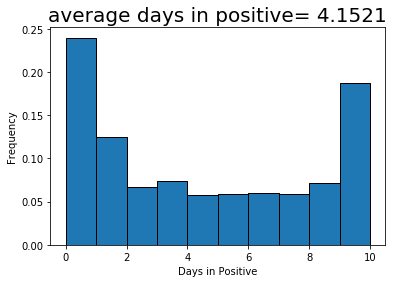

In [201]:
# Your code here

def estimate_P(n=10000):
    # runs the above function n times and plots the histogram of results
    total_days = []
    for i in range(n):
        days_in_pos = number_of_positive_days_in_year()
        total_days.append(days_in_pos)
    avg_days = sum(total_days)
    avg_days = avg_days / n
    

    plt.hist(total_days, bins=10, edgecolor='black', density=True)
    plt.xlabel("Days in Positive")
    plt.ylabel("Frequency")
    plt.title("average days in positive= "  + str(avg_days),fontsize=20)
    plt.show()
    
estimate_P()

<b>Think:</b> Was this the result you expected?

<b>Answer:</b> The simulation shows that on average the stock will spend only 4 days being greater than 0. Intuitively, given that the stock can go up or down by 1 with equal probability, hence has an expectance of 0, I would have guessed that the stock spends about half of the days at 0 and then half of the remaining time split between being negative and positive, ie I was expecting an outcome of around 365/4. Due to this intuitive approach, the results of the simulation are surprising to me because the stock is spending on average only 4/365 in positive, which at first glance is much less than what I expected. In fact looking at the distribution for most trials the stock spends 0 days in positive, ie it either is 0 or in the negative. This is in fact even more surprising to the intuition. 